In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter
import datetime
import itertools
import matplotlib.dates as mdates
from scipy.optimize import curve_fit
import matplotlib.ticker as ticker
import time

In [2]:
plt.style.use('seaborn-poster')

In [3]:
#cases daily
#x= "4 mar, 5 mar, 6 mar, 7 mar, 8 mar, 9 mar, 10 mar, 11 mar, 12 mar, 13 mar, 14 mar, 15 mar, 16 mar, 17 mar, 18 mar, 19 mar, 20 mar, 21 mar, 22 mar, 23 mar, 24 mar, 25 mar, 26 mar, 27 mar, 28 mar, 29 mar, 30 mar, 31 mar, 1 kwi, 2 kwi, 3 kwi, 4 kwi, 5 kwi, 6 kwi, 7 kwi, 8 kwi, 9 kwi, 10 kwi, 11 kwi, 12 kwi, 13 kwi, 14 kwi, 15 kwi, 16 kwi, 17 kwi, 18 kwi, 19 kwi, 20 kwi, 21 kwi, 22 kwi, 23 kwi, 24 kwi, 25 kwi, 26 kwi, 27 kwi, 28 kwi, 29 kwi, 30 kwi, 1 maj"
#y1="1, 0, 4, 1, 5, 6, 5, 9, 20, 17, 36, 21, 52, 61, 49, 68, 70, 111, 98, 115, 152, 150, 170, 168, 249, 224, 193, 256, 243, 392, 437, 244, 475, 311, 435, 357, 370, 380, 401, 318, 260, 268, 380, 336, 461, 363, 545, 306, 263, 313, 342, 381, 381, 344, 285, 316, 422, 237, 228"
x= "4 mar, 5 mar, 6 mar, 7 mar, 8 mar, 9 mar, 10 mar, 11 mar, 12 mar, 13 mar, 14 mar, 15 mar, 16 mar, 17 mar, 18 mar, 19 mar, 20 mar, 21 mar, 22 mar, 23 mar, 24 mar, 25 mar, 26 mar, 27 mar, 28 mar, 29 mar, 30 mar, 31 mar, 1 kwi, 2 kwi, 3 kwi, 4 kwi, 5 kwi, 6 kwi, 7 kwi, 8 kwi, 9 kwi, 10 kwi, 11 kwi, 12 kwi, 13 kwi, 14 kwi, 15 kwi, 16 kwi, 17 kwi, 18 kwi, 19 kwi, 20 kwi, 21 kwi, 22 kwi, 23 kwi, 24 kwi, 25 kwi, 26 kwi, 27 kwi, 28 kwi, 29 kwi, 30 kwi, 1 maj, 2 maj, 3 maj, 4 maj, 5 maj, 6 maj, 7 maj, 8 maj, 9 maj, 10 maj, 11 maj, 12 maj, 13 maj, 14 maj, 15 maj, 16 maj, 17 maj, 18 maj, 19 maj, 20 maj, 21 maj, 22 maj, 23 maj, 24 maj, 25 maj, 26 maj, 27 maj, 28 maj, 29 maj, 30 maj, 31 maj, 1 cze, 2 cze, 3 cze, 4 cze, 5 cze, 6 cze, 7 cze, 8 cze, 9 cze, 10 cze, 11 cze, 12 cze, 13 cze, 14 cze, 15 cze, 16 cze, 17 cze, 18 cze, 19 cze, 20 cze, 21 cze, 22 cze, 23 cze, 24 cze, 25 cze, 26 cze, 27 cze, 28 cze, 29 cze, 30 cze, 1 lip, 2 lip, 3 lip, 4 lip, 5 lip, 6 lip, 7 lip, 8 lip, 9 lip, 10 lip, 11 lip, 12 lip"
y1= "1, 0, 4, 1, 5, 6, 5, 9, 20, 17, 36, 21, 52, 61, 49, 68, 70, 111, 98, 115, 152, 150, 170, 168, 249, 224, 193, 256, 243, 392, 437, 244, 475, 311, 435, 357, 370, 380, 401, 318, 260, 268, 380, 336, 461, 363, 545, 306, 263, 313, 342, 381, 381, 344, 285, 316, 422, 300, 228, 270, 318, 313, 425, 311, 324, 340, 288, 345, 330, 595, 322, 411, 401, 241, 272, 356, 383, 471, 405, 476, 316, 395, 341, 445, 399, 352, 333, 412, 219, 380, 236, 292, 361, 362, 576, 575, 599, 400, 282, 359, 376, 440, 375, 396, 407, 506, 263, 352, 309, 311, 296, 300, 294, 298, 285, 319, 193, 247, 239, 382, 371, 259, 314, 231, 205, 257, 277, 262, 265, 305, 370, 299"

In [4]:
x_cases = x.split(", ")
y_cases = y1.split(", ")
y_cases = [float(el) for el in y_cases]

In [5]:
len(x_cases)

131

In [6]:
len(y_cases)

132

In [7]:
#tests daily
#x= "3 mar, 4 mar, 5 mar, 6 mar, 7 mar, 8 mar, 9 mar, 10 mar, 11 mar, 12 mar, 13 mar, 14 mar, 15 mar, 16 mar, 17 mar, 18 mar, 19 mar, 20 mar, 21 mar, 22 mar, 23 mar, 24 mar, 25 mar, 26 mar, 27 mar, 28 mar, 29 mar, 30 mar, 31 mar, 1 kwi, 2 kwi, 3 kwi, 4 kwi, 5 kwi, 6 kwi, 7 kwi, 8 kwi, 9 kwi, 10 kwi, 11 kwi, 12 kwi, 13 kwi, 14 kwi, 15 kwi, 16 kwi, 17 kwi, 18 kwi, 19 kwi, 20 kwi, 21 kwi, 22 kwi, 23 kwi, 24 kwi, 25 kwi, 26 kwi, 27 kwi, 28 kwi, 29 kwi, 30 kwi, 1 maj"
#y1= "559, 25, 92, 179, 0, 299, 230, 246, 394, 210, 655, 1525, 1079, 1206, 1200, 1616, 1681, 1876, 2012, 2523, 2520, 2771, 3326, 3340, 4503, 4307, 4409, 3824, 4812, 4382, 5377, 5760, 5963, 7856, 4710, 6748, 7069, 8313, 10698, 11265, 8447, 5623, 4691, 8172, 12578, 10583, 13306, 11286, 9990, 10120, 14444,  11920, 14482, 13793, 11639, 7226, 12885, 13783, 13500, 16601"

x= "4 mar, 5 mar, 6 mar, 7 mar, 8 mar, 9 mar, 10 mar, 11 mar, 12 mar, 13 mar, 14 mar, 15 mar, 16 mar, 17 mar, 18 mar, 19 mar, 20 mar, 21 mar, 22 mar, 23 mar, 24 mar, 25 mar, 26 mar, 27 mar, 28 mar, 29 mar, 30 mar, 31 mar, 1 kwi, 2 kwi, 3 kwi, 4 kwi, 5 kwi, 6 kwi, 7 kwi, 8 kwi, 9 kwi, 10 kwi, 11 kwi, 12 kwi, 13 kwi, 14 kwi, 15 kwi, 16 kwi, 17 kwi, 18 kwi, 19 kwi, 20 kwi, 21 kwi, 22 kwi, 23 kwi, 24 kwi, 25 kwi, 26 kwi, 27 kwi, 28 kwi, 29 kwi, 30 kwi, 1 maj, 2 maj, 3 maj, 4 maj, 5 maj, 6 maj, 7 maj, 8 maj, 9 maj, 10 maj, 11 maj, 12 maj, 13 maj, 14 maj, 15 maj, 16 maj, 17 maj, 18 maj, 19 maj, 20 maj, 21 maj, 22 maj, 23 maj, 24 maj, 25 maj, 26 maj, 27 maj, 28 maj, 29 maj, 30 maj, 31 maj, 1 cze, 2 cze, 3 cze, 4 cze, 5 cze, 6 cze, 7 cze"
y1= "25, 92, 179, 0, 299, 230, 246, 394, 210, 655, 1525, 1079, 1206, 1200, 1616, 1681, 1876, 2012, 2523, 2520, 2771, 3326, 3340, 4503, 4307, 4409, 3824, 4812, 4382, 5377, 5760, 5963, 7856, 4710, 6748, 7069, 8313, 10698, 11265, 8447, 5623, 4691, 8172, 12578, 10583, 13306, 11286, 9990, 10119, 14444, 11920, 14482, 13793, 11639, 7226, 12885, 13783, 13500, 16601, 11385, 9935, 7856, 10466, 16198, 15526, 17512, 17280, 16218, 14312, 16562, 20344, 26235, 21919, 25118, 18855, 15797, 17178, 21637, 22369, 22341, 31368, 16502, 12135, 22197, 23021, 21958, 26724, 25613, 16477, 15974, 14435, 21222, 29427, 18333, 23344, 18115"

In [8]:
x_tests = x.split(", ")
y_tests = y1.split(", ")
y_tests = [float(el) for el in y_tests]

In [9]:
len(x_tests)

96

In [10]:
len(y_tests)

96

In [11]:
##recoveries daily
x= "4 mar, 5 mar, 6 mar, 7 mar, 8 mar, 9 mar, 10 mar, 11 mar, 12 mar, 13 mar, 14 mar, 15 mar, 16 mar, 17 mar, 18 mar, 19 mar, 20 mar, 21 mar, 22 mar, 23 mar, 24 mar, 25 mar, 26 mar, 27 mar, 28 mar, 29 mar, 30 mar, 31 mar, 1 kwi, 2 kwi, 3 kwi, 4 kwi, 5 kwi, 6 kwi, 7 kwi, 8 kwi, 9 kwi, 10 kwi, 11 kwi, 12 kwi, 13 kwi, 14 kwi, 15 kwi, 16 kwi, 17 kwi, 18 kwi, 19 kwi, 20 kwi, 21 kwi, 22 kwi, 23 kwi, 24 kwi, 25 kwi, 26 kwi, 27 kwi, 28 kwi, 29 kwi, 30 kwi, 1 maj, 2 maj, 3 maj, 4 maj, 5 maj, 6 maj, 7 maj, 8 maj, 9 maj, 10 maj, 11 maj, 12 maj, 13 maj, 14 maj, 15 maj, 16 maj, 17 maj, 18 maj, 19 maj, 20 maj, 21 maj, 22 maj, 23 maj, 24 maj, 25 maj, 26 maj, 27 maj, 28 maj, 29 maj, 30 maj, 31 maj, 1 cze, 2 cze, 3 cze, 4 cze, 5 cze, 6 cze, 7 cze, 8 cze, 9 cze, 10 cze, 11 cze, 12 cze, 13 cze, 14 cze"
y2 = "0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 3, 3, 3, 3, 4, 10, 19, 20, 23, 28, 35, 35, 47, 47, 47, 116, 134, 162, 191, 222, 284, 318, 375, 439, 487, 618, 668, 774, 866, 981, 1040, 1133, 1297, 1513, 1740, 1944, 2126, 2265, 2466, 2655, 3025, 3236, 3491, 3762, 3945, 4095, 4280, 4655, 4862, 5184, 5437, 5698, 5816, 6131, 6410, 6696, 6918, 7175, 7451, 7628, 7903, 8183, 8452, 8731, 8977, 9194, 9276, 10020, 10330, 10560, 10692, 11016, 11271, 11449, 11726, 12014, 12227, 12410, 12641, 12855, 12998, 13196, 13411, 13696, 13805, 14104, 14226"

In [12]:
x_recov = x.split(", ")
y_recov = y2.split(", ")
y_recov = [float(el) for el in y_recov]

ValueError: x and y must have same first dimension, but have shapes (131,) and (132,)

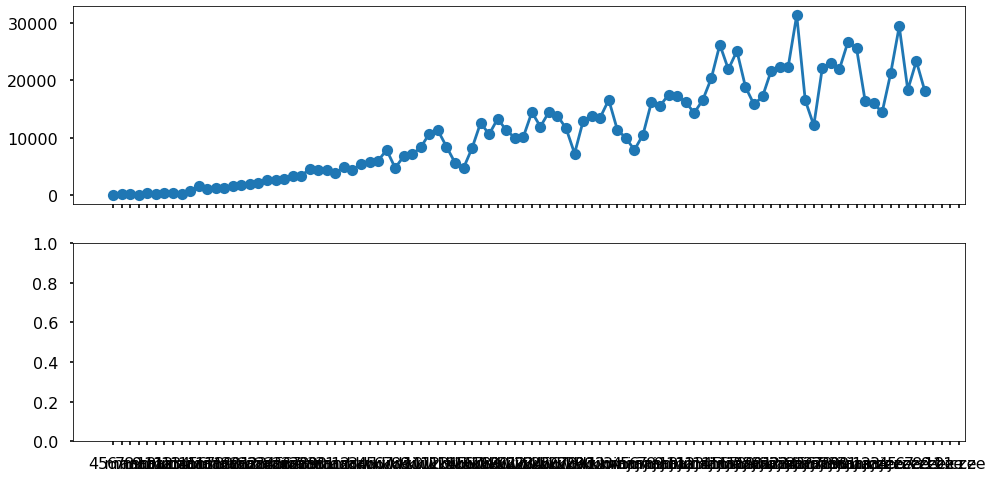

In [13]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(16, 8), sharex=True)
ax1.plot(x_tests, y_tests, marker="o")
ax2.plot(x_cases, y_cases, marker="o")
tick_spacing=7
ax2.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax2.xaxis.set_tick_params(rotation=45, direction="out")

ax2.tick_params(direction='inout', length=18, colors='k')  
ax1.grid(True)
ax2.grid(True)

ax1.set(#xlabel="Data",
       ylabel="Liczba testów",
        title="")
ax2.set(xlabel="Data",
       ylabel="Liczba potwierdzonych zakażeń",)
#       title="Czas niezbędny do podwojenia liczby przypadków w aktualnym tempie wzrostu")



In [14]:
np.mean(y_cases[30:])

347.6078431372549

In [15]:
#print(x_cases)
lenx=len(x_cases)
full_weeks = int(lenx/7)
start=full_weeks*7
weekly_mean=[]
weekly_sd=[]
weekly_x=[]
for week in range(full_weeks):
    #print(week)
    #print(-start+week*7, -start+(week+1)*7)
    if (-start+(week+1)*7) < 0:
        #print(x_cases[-start+week*7:-start+(week+1)*7])
        #print(y_cases[-start+week*7:-start+(week+1)*7])
        #print(x_cases[(-start+(week+1)*7)-1])
        weekly_x.append(x_cases[(-start+(week+1)*7)-1])
        weekly_mean.append(np.mean(y_cases[-start+week*7:-start+(week+1)*7]))
        weekly_sd.append(np.std(y_cases[-start+week*7:-start+(week+1)*7]))
    else:
        #print(x_cases[-start+week*7:])
        #print(y_cases[-start+week*7:])
        weekly_mean.append(np.mean(y_cases[-start+week*7:]))
        weekly_sd.append(np.std(y_cases[-start+week*7:]))
        weekly_x.append(x_cases[-1])

[22.857142857142858, 81.71428571428571, 186.57142857142858, 336.85714285714283, 360.14285714285717, 379.85714285714283, 329.85714285714283, 309.57142857142856, 337.57142857142856, 371.14285714285717, 398.14285714285717, 362.85714285714283, 428.7142857142857, 375.42857142857144, 349.14285714285717, 276.57142857142856, 285.85714285714283, 290.7142857142857]
[15.018356115373054, 24.069626893151256, 34.82961442244698, 90.07207997951826, 52.88647834595091, 87.85609755475724, 41.994654664708975, 54.87090601157058, 39.83844927725384, 108.2344394245705, 55.637676267149786, 68.10376237022145, 139.8751630007622, 45.032867815335386, 76.78435214738663, 39.716341159553465, 65.19077185226355, 36.585376804378654]


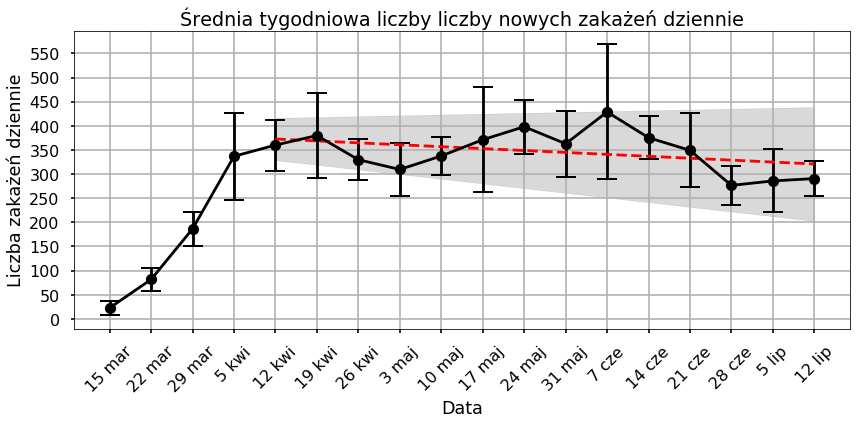

In [16]:
#weekly_x = weekly_x[:-1]
#weekly_mean = weekly_mean[:-1]
#weekly_sd = weekly_sd[:-1]

def linear(x,a,b):
    y = a*x + b
    return y

start_fit=4
x_fit = np.arange(len(weekly_x[start_fit:]))
linear_popt, linear_pcov = curve_fit(linear, x_fit, weekly_mean[start_fit:])
linear_fit = linear(np.array(x_fit), *linear_popt)
correlation = np.corrcoef(x_fit, weekly_mean[start_fit:])

sigma = np.sqrt(np.diagonal(linear_pcov))
bound_upper = linear(np.array(x_fit), *(linear_popt + 2*sigma))
bound_lower = linear(np.array(x_fit), *(linear_popt - 2*sigma))


fig, (ax1) = plt.subplots(1,1, figsize=(12,6), sharex=True)
ax1.errorbar(weekly_x, y=weekly_mean, yerr=weekly_sd, marker="o", color="black", 
             ecolor="black", capsize=10, capthick=2)

ax1.plot(weekly_x[start_fit:], linear_fit, linestyle="--", color="red")
ax1.fill_between(weekly_x[start_fit:], bound_upper, bound_lower,
                color = 'black', alpha = 0.15)


ax1.xaxis.set_tick_params(rotation=45, direction="out")
ax1.grid(True)

y_tick_spacing=50
ax1.yaxis.set_major_locator(ticker.MultipleLocator(y_tick_spacing))

ax1.set(title="Średnia tygodniowa liczby liczby nowych zakażeń dziennie",
    xlabel="Data",
       ylabel="Liczba zakażeń dziennie",)
#legend = ax1.legend(frameon=1, facecolor='white', framealpha=1, fontsize=16, handlelength=1.8, loc='lower right')

fig.tight_layout()
timestamp=time.strftime("%Y_%m_%d")
fig.savefig("./predictions_for_poland_figures/weekly_mean_"+timestamp+".png")

print(weekly_mean)
print(weekly_sd)

In [17]:
np.mean([0,0,1,3][2:])

2.0

In [21]:
np.mean(weekly_mean[4:])

346.8265306122449

In [27]:
weekly_mean

[22.857142857142858,
 81.71428571428571,
 186.57142857142858,
 336.85714285714283,
 360.14285714285717,
 379.85714285714283,
 329.85714285714283,
 309.57142857142856,
 337.57142857142856,
 371.14285714285717,
 398.14285714285717,
 362.85714285714283,
 428.7142857142857,
 375.42857142857144,
 349.14285714285717,
 276.57142857142856,
 285.85714285714283,
 290.7142857142857]

In [ ]:
def linear(x,a,b):
    y = a*x + b
    return y

linear_popt, linear_pcov = curve_fit(linear, y_tests, y_cases)
linear_fit = linear(np.array(y_tests), *linear_popt)
correlation = np.corrcoef(y_tests, y_cases)
R=np.round(correlation[0,1],3)

#Only for number of tests below 5000
linear_popt, linear_pcov = curve_fit(linear, y_tests[:29], y_cases[:29])
limited_linear_fit = linear(np.array(y_tests), *linear_popt)
correlation = np.corrcoef(y_tests[:29], y_cases[:29])
R_limited=np.round(correlation[0,1],3)


fig, (ax1) = plt.subplots(1,1, figsize=(10,10), sharex=True)
ax1.plot(y_tests, y_cases, marker="o", linestyle="",)
ax1.plot(y_tests[:29], limited_linear_fit[:29], color="red", label="Dopasowanie liniowe dla \n liczby testów < 5000, R="+str(R_limited))
ax1.plot(y_tests, linear_fit,  color="orange", label="Dopasowanie liniowe dla \n wszystkich danych, R="+str(R))

ax1.xaxis.set_tick_params(rotation=45, direction="out")
ax1.grid(True)

ax1.set_xlim([0,18000])
ax1.set_ylim([0,575])

x_tick_spacing=1000
ax1.xaxis.set_major_locator(ticker.MultipleLocator(x_tick_spacing))

y_tick_spacing=50
ax1.yaxis.set_major_locator(ticker.MultipleLocator(y_tick_spacing))

ax1.set(xlabel="Liczba testów dziennie",
       ylabel="Liczba potwierdzonych zakażeń dziennie",)
legend = ax1.legend(frameon=1, facecolor='white', framealpha=1, fontsize=16, handlelength=1.8, loc='lower right')


